Data Quality Test

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import openpyxl

#reading dataset
df = pd.read_excel(r"/Users/vivianetrindade/Documents/data quality test/Salesdata_demo.xlsx")
df.head()

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,City,Country,Region,Product ID,Channel,Sales,Quantity,Discount,Profit
0,1,ES-2014-1311038,2014-02-07 00:00:00,AS-10045,Aaron Smayling,Corporate,Leeds,United Kingdom,North,OFF-ST-10000988,Store,79.20,3,0.0,39.60
1,2,ES-2014-1311038,2014-02-07 00:00:00,AS-10045,Aaron Smayling,Corporate,Leeds,United Kingdom,North,TEC-AC-10004144,Internet,388.92,7,0.0,0.00
2,3,ES-2014-1311038,2014-02-07 00:00:00,AS-10045,Aaron Smayling,Corporate,Leeds,United Kingdom,North,OFF-LA-10001915,Office Supplies,35.19,3,0.0,16.11
3,4,ES-2014-1311038,2014-02-07 00:00:00,AS-10045,Aaron Smayling,Corporate,Leeds,United Kingdom,North,OFF-ST-10004550,Office Supplies,50.94,2,0.0,13.20
4,5,ES-2014-1311038,2014-02-07 00:00:00,AS-10045,Aaron Smayling,Corporate,Leeds,United Kingdom,North,TEC-AC-10004068,Technology,307.44,3,0.0,73.71


Generate Descriptive Statistics


In [11]:
#aggregating categorical values
df.aggregate({'Order Date':['count', 'nunique'],
              'City':['count', 'nunique'],
              'Product ID':['count', 'nunique'],
              'Sales':['count', 'nunique'],
              'Quantity':['count','nunique']
              })

,Order Date,City,Product ID,Sales,Quantity
count,10000,10000,10000,9996,10000
nunique,1256,1069,1915,6601,14


In [12]:
#aggregating numerical values
descriptivest=df.aggregate({'Sales':['mean', 'median', 'min', 'max', 'sum'],
            'Quantity':['mean', 'median', 'min', 'max', 'sum']})
descriptivest['Sales'] = descriptivest['Sales'].map("${:,.0f}".format)
descriptivest

,Sales,Quantity
mean,$294,3.7773
median,$119,3.0000
min,$3,1.0000
max,"$7,959",14.0000
sum,"$2,936,255",37773.0000


Frequency table and Histogram

In [13]:
import seaborn as sns

sns.set_style("white")
sns.set_context("paper", font_scale= 1.5)
import matplotlib.pyplot as plt
#creating frequency table "Order Date"
order_date = pd.crosstab(index=df['Order Date'], columns='value_count').sort_values("value_count", ascending=False)
order_date.head(10)

col_0,value_count
Order Date,
2012-08-03 00:00:00,34
2014-08-04 00:00:00,34
2014-11-12 00:00:00,34
2013-06-13 00:00:00,32
2014-08-11 00:00:00,32
2014-08-12 00:00:00,31
2014-09-16 00:00:00,30
2014-06-18 00:00:00,30
2014-12-29 00:00:00,29


Text(0, 0.5, 'Frequency')

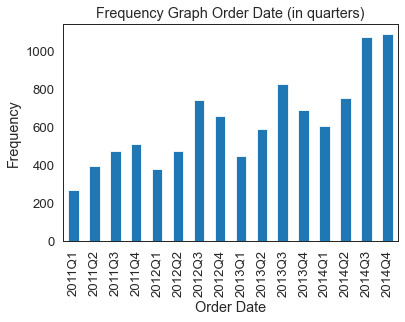

In [15]:
#ploting frequency "Order Date"
df['Order Date']= df['Order Date'].replace(['2014-13-25', '2014-12-25 00:00:00'])
df['Order Date']= pd.to_datetime(df['Order Date'])
orders_per_quarter = df.groupby([df['Order Date'].dt.to_period("Q")])
orders_per_quarter["Row ID"].count().plot(kind="bar")
plt.title("Frequency Graph Order Date (in quarters)")
plt.ylabel("Frequency")

In [16]:
#creating frequency table "City"
city_table = pd.crosstab(index=df['City'], columns='value_count').sort_values("value_count", ascending=False)
city_table.head(10)

col_0,value_count
City,
London,257
Berlin,217
Vienna,202
Paris,187
Madrid,171
Hamburg,133
Rome,129
Stockholm,124
Marseille,102


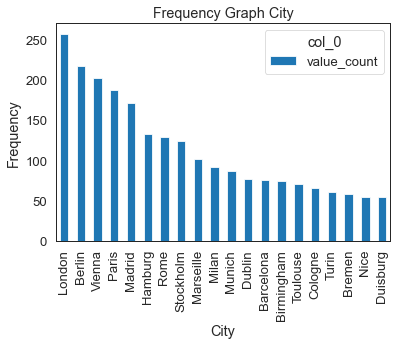

In [17]:
#ploting frequency graph "City"
city_table.head(20).plot(kind='bar');
plt.title("Frequency Graph City")
plt.ylabel("Frequency")
plt.show()

In [18]:
#creating frequency table "Product ID)
productid_table = pd.crosstab(index=df['Product ID'], columns='value_count').sort_values("value_count", ascending=False)
productid_table.head(10)

col_0,value_count
Product ID,
OFF-AR-10003651,29
OFF-BI-10002570,27
OFF-BI-10003708,24
OFF-AR-10000110,22
OFF-AR-10004825,22
OFF-AR-10001418,20
OFF-AR-10002805,20
OFF-AR-10004519,20
OFF-BI-10000179,20


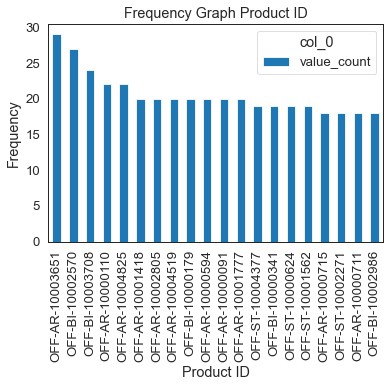

In [19]:
#ploting frequency graph
productid_table.head(20).plot(kind='bar');
plt.title("Frequency Graph Product ID")
plt.ylabel("Frequency")
plt.show()

In [20]:
#creating frequency table "Sales"
dfcurrency= pd.DataFrame(df["Sales"])

dfcurrency['Sales'] = dfcurrency['Sales'].map("${:,.0f}".format)
sales_table = pd.crosstab(index=dfcurrency['Sales'], columns='value_count').sort_values("value_count", ascending=False)
sales_table.head(10)

col_0,value_count
Sales,
$27,99
$44,86
$34,80
$28,78
$30,77
$22,75
$40,74
$53,74
$31,71


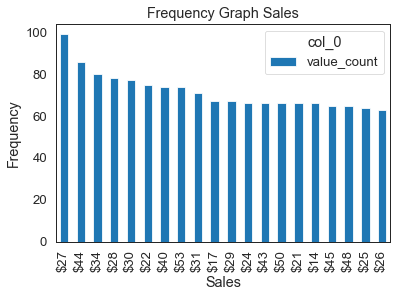

In [21]:
#ploting frequency graph "Sales"
sales_table.head(20).plot(kind='bar')
plt.title("Frequency Graph Sales")
plt.ylabel("Frequency")
plt.show()

In [22]:
#creating frequency table "Quantity"
quantity_table = pd.crosstab(index=df['Quantity'], columns='value_count')
quantity_table

col_0,value_count
Quantity,
1,870
2,2426
3,2422
4,1237
5,1200
6,596
7,583
8,260
9,232


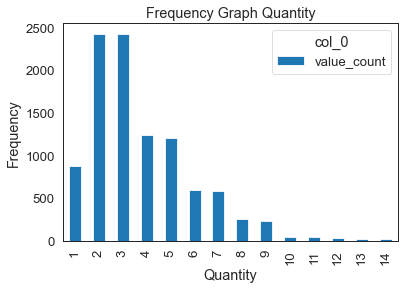

In [23]:
#ploting "Quantity"
quantity_table.plot(kind='bar');
plt.title("Frequency Graph Quantity")
plt.ylabel("Frequency")
plt.show()

In [24]:
#replacing one date
df['Order Date']= df['Order Date'].replace(['2014-13-25', '2014-12-25 00:00:00'])
df['Order Date']= pd.to_datetime(df['Order Date'])
df.dtypes

/Users/vivianetrindade/opt/anaconda3/envs/main/lib/python3.7/site-packages/pandas/core/missing.py:94: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Customer ID              object
Customer Name            object
Segment                  object
City                     object
Country                  object
Region                   object
Product ID               object
Channel                  object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

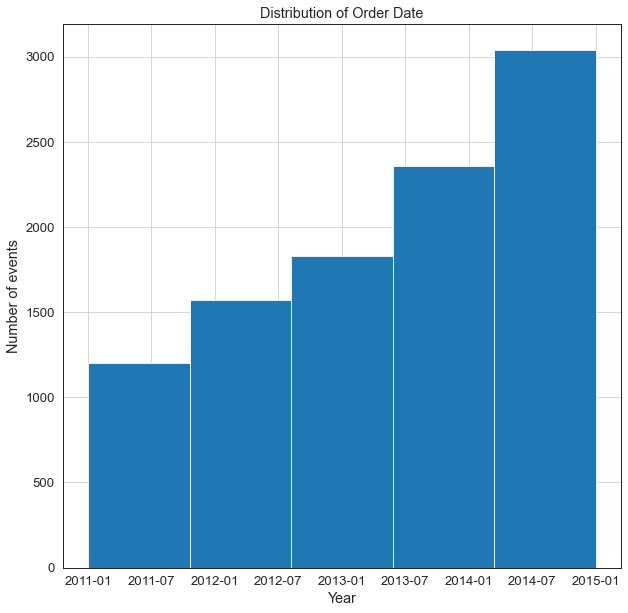

In [25]:
#ploting Histogram "Order date"

df.hist(column='Order Date',
        figsize=(10,10),
        bins=5);
plt.title("Distribution of Order Date")
plt.xlabel("Year")
plt.ylabel("Number of events")
plt.show()

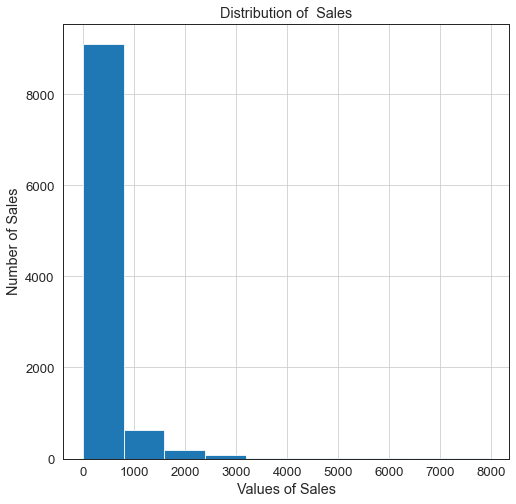

In [26]:
#ploting Histogram "Sales"
df.hist(column='Sales',
        figsize=(8,8),
        bins=10);

plt.title("Distribution of  Sales")
plt.ylabel("Number of Sales")
plt.xlabel("Values of Sales")
plt.show()

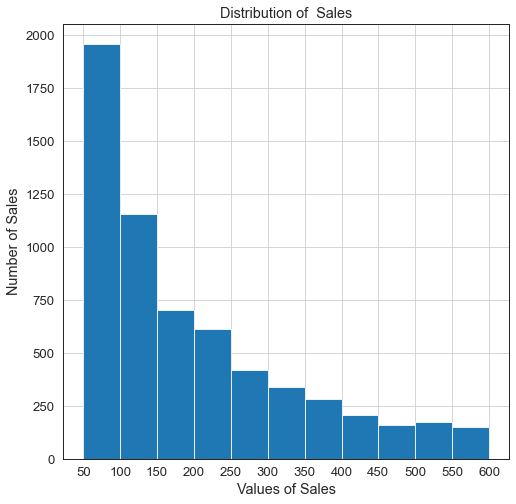

In [27]:
#ploting Histogram "Sales"
bins=[50,100,150,200,250,300,350,400,450,500,550,600]
df.hist(column='Sales',
        figsize=(8,8),
        bins=bins);
plt.xticks(bins)
plt.title("Distribution of  Sales")
plt.ylabel("Number of Sales")
plt.xlabel("Values of Sales")
plt.show()

In [28]:
df2= pd.crosstab(df.Sales, df.City)
df2

City,Aachen,Aalen,Aalst,Abbeville,Aberdeen,Acerra,Acireale,Afragola,Agde,Agen,...,Worthing,Wuppertal,Yerres,York,Zaanstad,Zamora,Zeist,Zurich,Zwickau,Zwolle
Sales,,,,,,,,,,,,,,,,,,,,,
2.955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726.160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5729.346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5785.020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


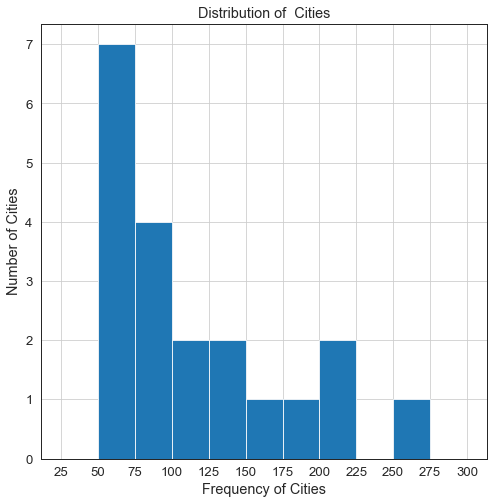

In [45]:
bins=[25,50, 75, 100, 125, 150, 175, 200, 225, 250,275, 300]
city_table.head(20).hist(column=["value_count"],
                         figsize=(8,8),
                         bins=bins);
plt.xticks(bins)
plt.title("Distribution of  Cities")
plt.ylabel("Number of Cities")
plt.xlabel("Frequency of Cities")
plt.show()

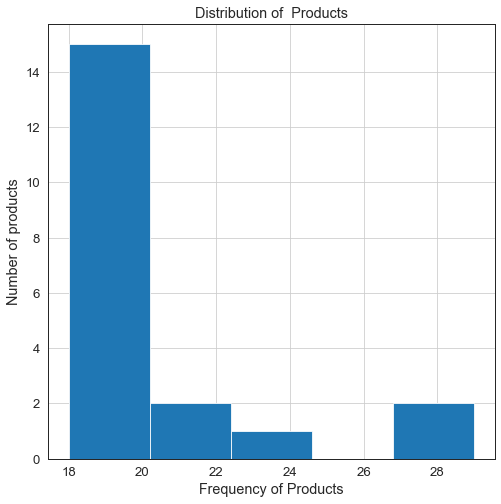

In [47]:
productid_table.head(20).hist(column=["value_count"],
                              figsize=(8,8),
                              bins=5);
plt.title("Distribution of  Products")
plt.ylabel("Number of products")
plt.xlabel("Frequency of Products")
plt.show()

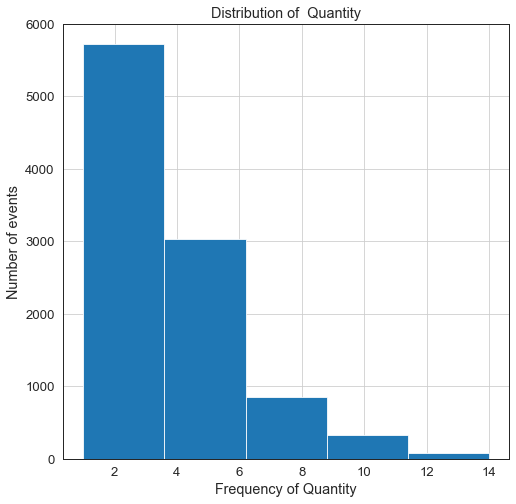

In [49]:
df.hist(column=["Quantity"],
                              figsize=(8,8),
                              bins=5);
plt.title("Distribution of  Quantity")
plt.ylabel("Number of events")
plt.xlabel("Frequency of Quantity")
plt.show()

In [ ]:
import plotly.express as px
#df.boxplot(column="Sales",
#           by="City",
#          figsize=(10,10))
# value_counts: Conta registros por cidade
# unique: registros unicos
top_cities = df['City'].value_counts().index.unique()

# pega somente o elemento 0 até 10
top10_cities = top_cities[0:10]

# filtra somente as cidades da lista top10_cities
df_top10_orders = df[df['City'].isin(top10_cities)]

# monta o grafico
# Dica: Se tirar o parametro orientation, o boxplot ficara na vertical, mas precisa inverter os eixos (x=City e y=Sales)
fig = px.box(df_top10_orders, y="City", x="Sales", orientation='h')

# exibe o grafico.
fig.show()

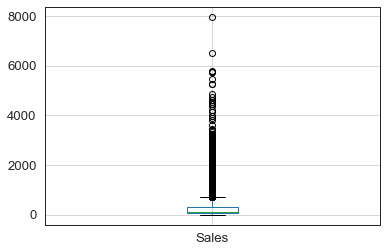

In [44]:
df.boxplot(column="Sales");

<AxesSubplot:>

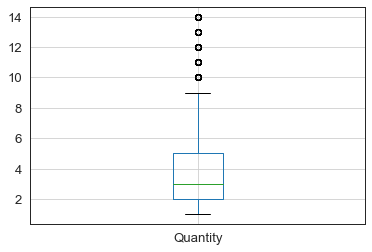

In [50]:
df.boxplot(column="Quantity")

In [52]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Customer ID      0
Customer Name    0
Segment          0
City             0
Country          0
Region           0
Product ID       0
Channel          2
Sales            4
Quantity         0
Discount         0
Profit           0
dtype: int64

Text(0, 0.5, 'Sales')

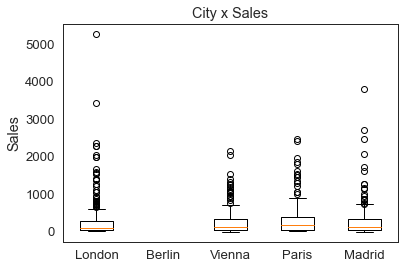

In [66]:
london= df.loc[df.City == "London"]["Sales"]
berlin= df.loc[df.City == "Berlin"]["Sales"]
vienna= df.loc[df.City== "Vienna"]["Sales"]
paris= df.loc[df.City== "Paris"]["Sales"]
madri= df.loc[df.City== "Madrid"]["Sales"]

labels = ["London", "Berlin", "Vienna", "Paris", "Madrid" ]
plt.boxplot([london,berlin,vienna, paris, madri], labels=labels);
plt.title("City x Sales")
plt.ylabel("Sales")

In [67]:
city_table.tail(10)


col_0,value_count
City,
Asti,1
Odivelas,1
Teramo,1
Terneuzen,1
Caluire-et-Cuire,1
Cambrai,1
Neuwied,1
Detmold,1
Hattingen,1
